# Credit Card Default Detection

## Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd

C:\Users\suchi\AppData\Local\Temp\ipykernel_19184\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
## Data Ingestions step
data=pd.read_csv("data\Credit_Card.csv")

In [10]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [12]:
data.isnull().values.any()

False

In [16]:
X=data.drop(labels=["default.payment.next.month"],axis=1)

In [17]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [21]:
y = data[["default.payment.next.month"]]

In [22]:
y

,default.payment.next.month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


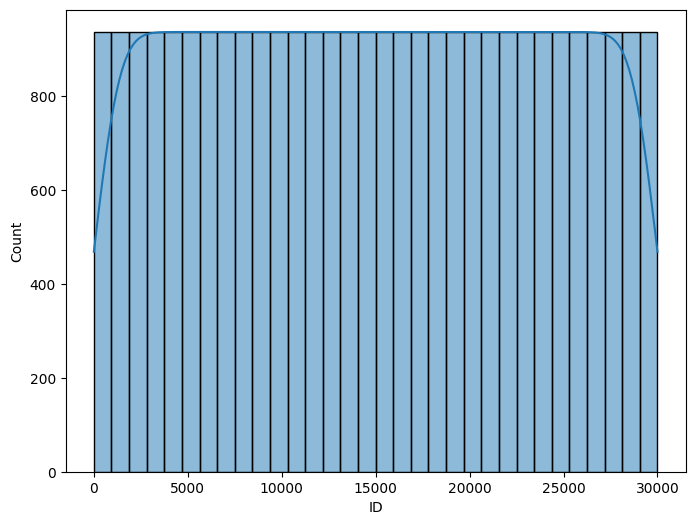

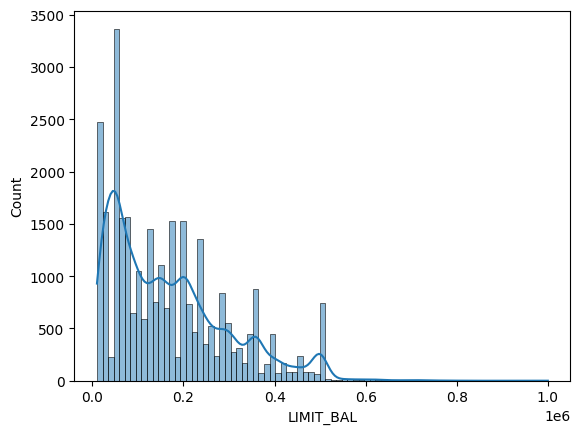

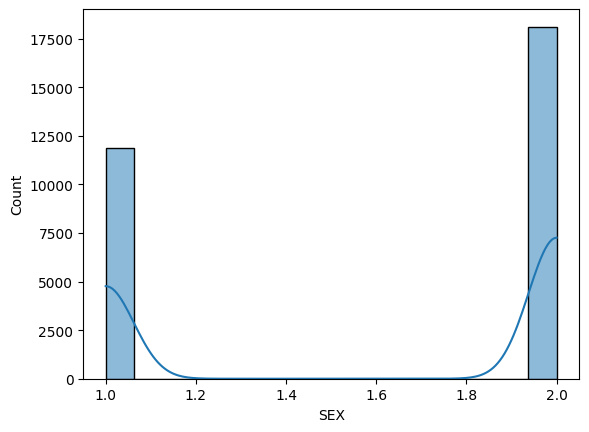

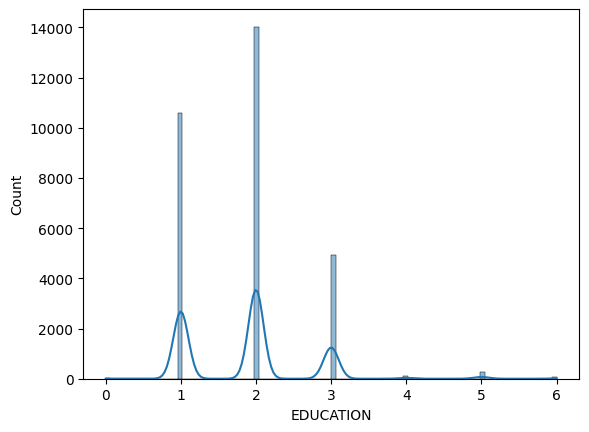

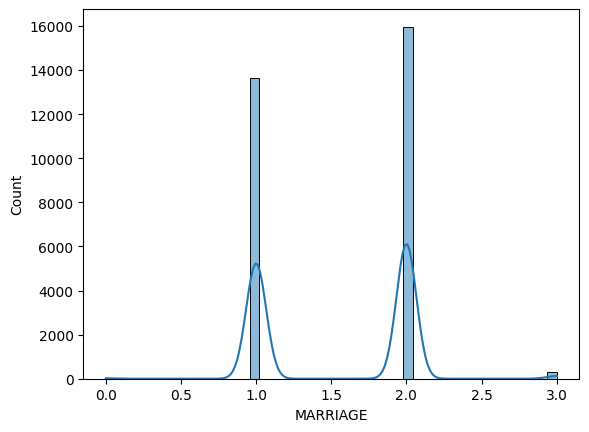

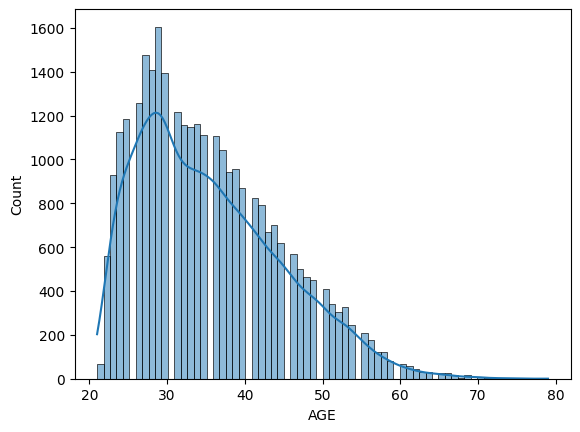

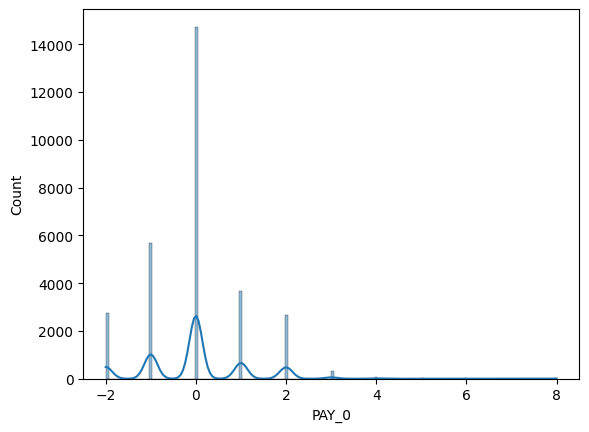

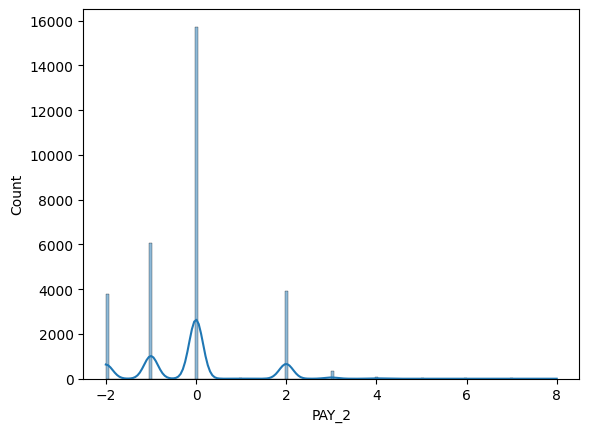

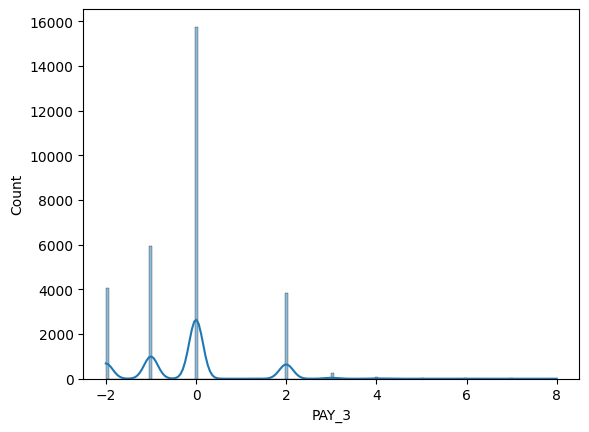

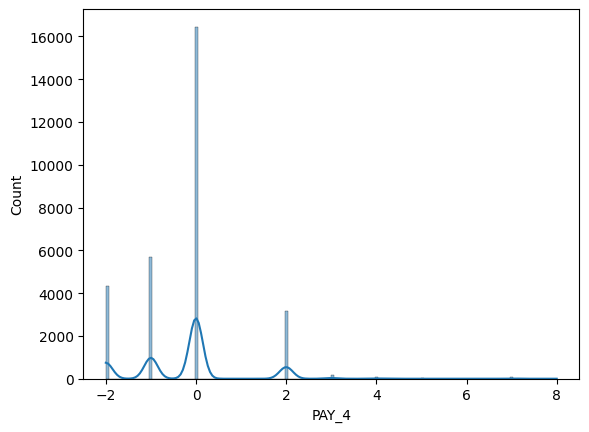

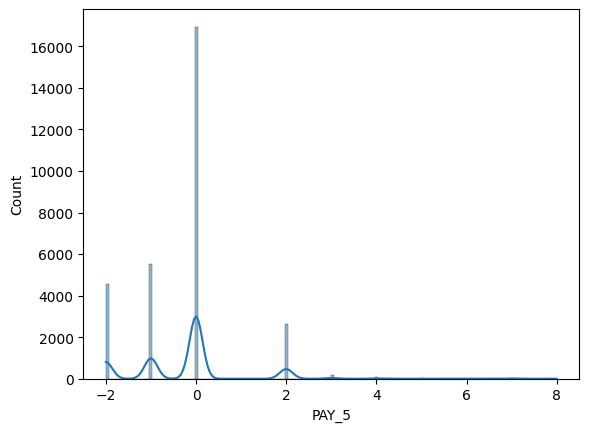

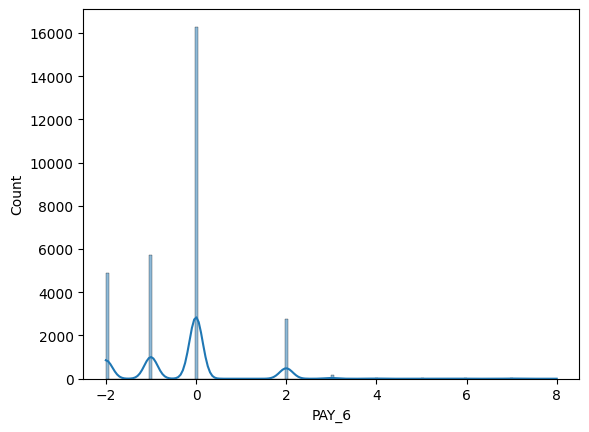

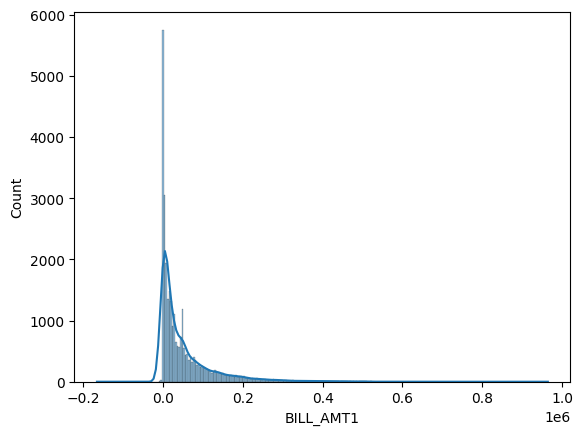

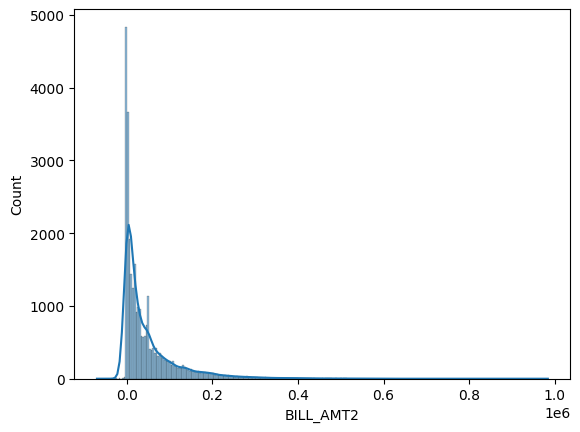

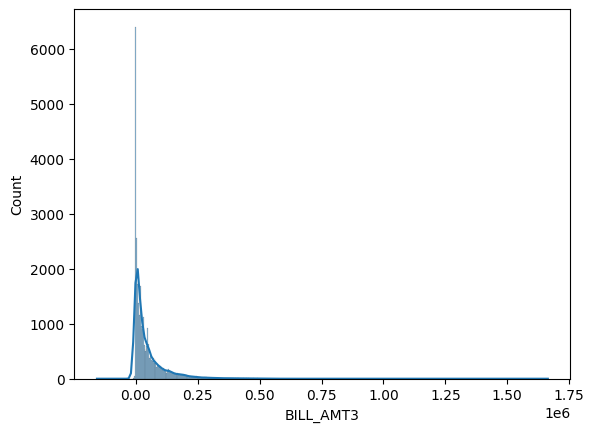

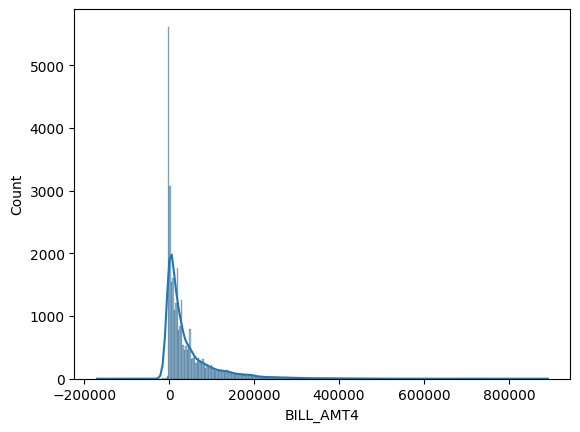

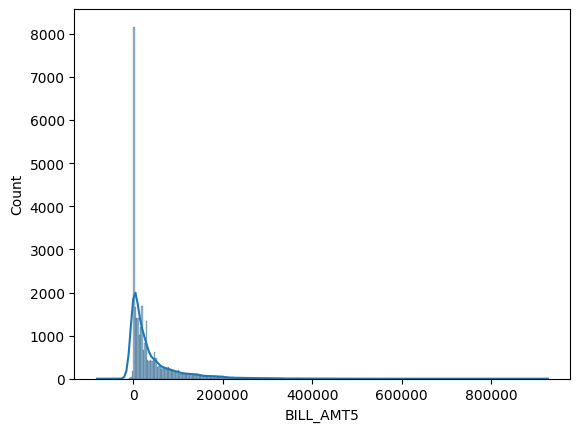

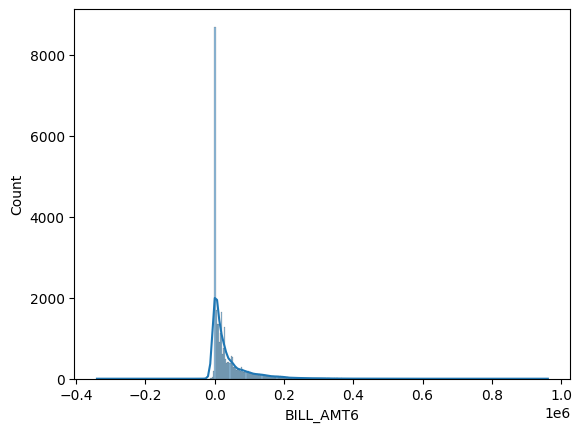

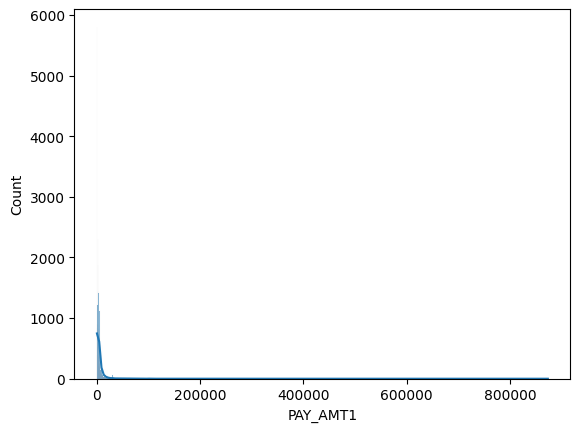

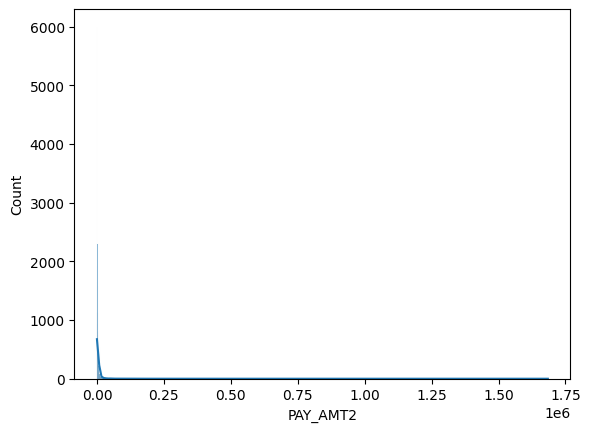

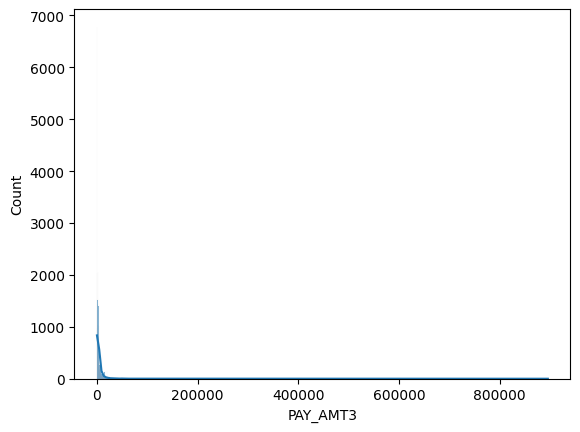

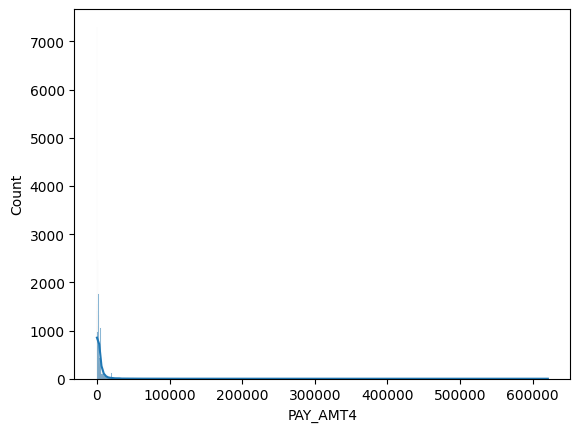

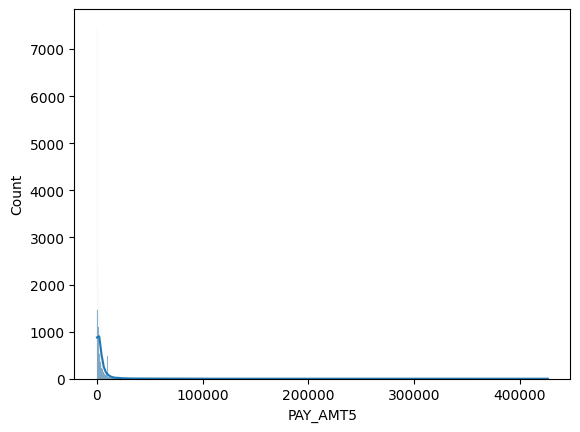

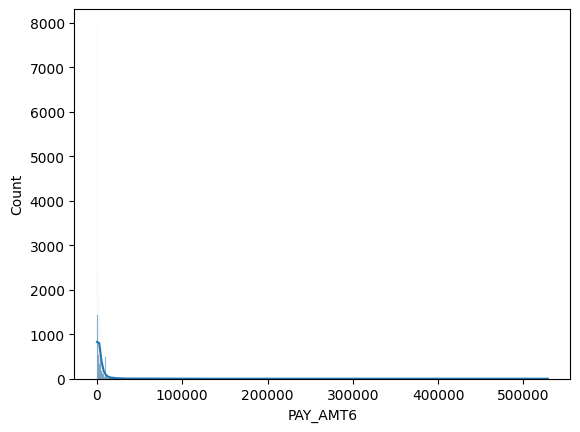

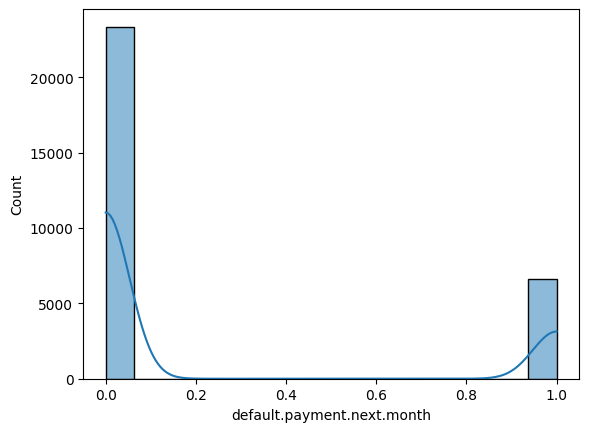

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
x=0
for i in data:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

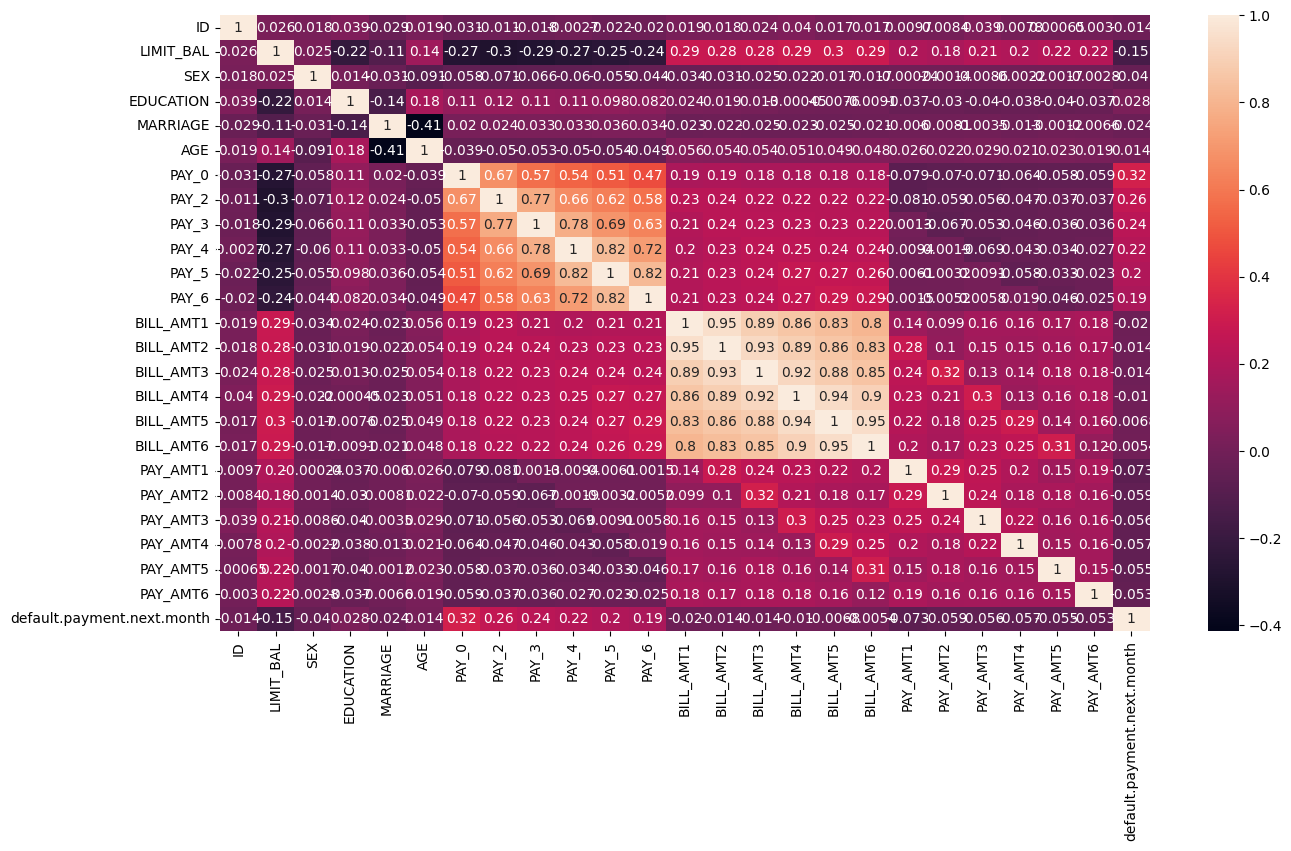

In [57]:
##Correlation
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [23]:
import sklearn
import scipy

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# we did train and test split before only why because we dont want data leakage
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [26]:
#preprocessing steps
from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [27]:
scaled_train_data=train_scaler.fit_transform(x_train)

In [28]:
scaled_test_data=train_scaler.transform(x_test)

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(scaled_train_data,y_train)

d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [30]:
y_pred=clf.predict(scaled_test_data)

In [31]:
from sklearn.metrics import accuracy_score 

In [32]:
accuracy_score(y_test,y_pred)*100

62.866666666666674

In [33]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

In [34]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(clf,param_grid=param_grid,cv=5,verbose=3)

In [35]:
gs.fit(scaled_train_data,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.550 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.655 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.699 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.607 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.633 total time=   0.0s


d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vecto

[CV 1/5] END .................var_smoothing=0.1;, score=0.626 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.739 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.756 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.717 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.738 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.551 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;, score=0.655 total time=   0.0s
[CV 3/5] END ...............var_smoothing=0.001;, score=0.701 total time=   0.0s
[CV 4/5] END ...............var_smoothing=0.001;, score=0.607 total time=   0.0s
[CV 5/5] END ...............var_smoothing=0.001;, score=0.635 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.5;, score=0.775 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.5;, score=0.783 total time=   0.0s
[CV 3/5] END ...............

d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vecto

[CV 5/5] END .................var_smoothing=0.5;, score=0.784 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.05;, score=0.584 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.05;, score=0.707 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.05;, score=0.732 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.05;, score=0.662 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.05;, score=0.686 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.01;, score=0.557 total time=   0.0s


d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vecto

[CV 2/5] END ................var_smoothing=0.01;, score=0.668 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.706 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.617 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.647 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.550 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.655 total time=   0.0s


d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vecto

[CV 3/5] END ...............var_smoothing=1e-08;, score=0.699 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.607 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.633 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.550 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;, score=0.655 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-07;, score=0.699 total time=   0.0s


d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vecto

[CV 4/5] END ...............var_smoothing=1e-07;, score=0.607 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-07;, score=0.633 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-06;, score=0.550 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-06;, score=0.655 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-06;, score=0.699 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-06;, score=0.607 total time=   0.0s


d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vecto

[CV 5/5] END ...............var_smoothing=1e-06;, score=0.633 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-10;, score=0.550 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-10;, score=0.655 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-10;, score=0.699 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-10;, score=0.607 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-10;, score=0.633 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-11;, score=0.550 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-11;, score=0.655 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-11;, score=0.699 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-11;, score=0.607 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-11;, score=0.633 total time=   0.0s


d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vecto

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [36]:
gs.cv_results_

{'mean_fit_time': array([0.02796416, 0.02014928, 0.02183533, 0.02226305, 0.02118893,
        0.02448511, 0.02637525, 0.02465072, 0.02523088, 0.02358098,
        0.02559791]),
 'std_fit_time': array([0.01695537, 0.00065153, 0.00327501, 0.00386252, 0.00152628,
        0.00182595, 0.00097818, 0.00197422, 0.00144562, 0.00339074,
        0.0045853 ]),
 'mean_score_time': array([0.00960121, 0.00840435, 0.00907178, 0.00891786, 0.00897617,
        0.01045876, 0.01079659, 0.01032076, 0.0109499 , 0.01140609,
        0.01007466]),
 'std_score_time': array([0.00135785, 0.00148812, 0.00160373, 0.00104878, 0.0013488 ,
        0.00070812, 0.00098075, 0.00081097, 0.00186958, 0.00149657,
        0.00322615]),
 'param_var_smoothing': masked_array(data=[1e-09, 0.1, 0.001, 0.5, 0.05, 0.01, 1e-08, 1e-07,
                    1e-06, 1e-10, 1e-11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=ob

In [37]:
gs.best_estimator_

GaussianNB(var_smoothing=0.5)

In [38]:
clf2 = GaussianNB(var_smoothing=0.5)
clf2.fit(scaled_train_data,y_train)
y_pred2=clf2.predict(scaled_test_data)
accuracy_score(y_test,y_pred2)*100

d:\Projects\Credit Card Default Prediction\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


78.8

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb=XGBClassifier()

In [42]:
xgb.fit(scaled_train_data,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred2=xgb.predict(scaled_test_data)

In [44]:
accuracy_score(y_test,y_pred2)

0.8156

In [45]:
param_grid_xgboost = { "n_estimators": [50,100, 130],
                        "max_depth": range(3,11,1),
                      "random_state":[0,50,100]
                     }

# Creating an object of the Grid Search class
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost,verbose=3,cv=5,n_jobs=-1)

In [46]:
grid.fit(scaled_train_data,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [47]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [48]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 50, 'random_state': 0}

In [49]:
xgb_new=XGBClassifier(max_depth=4, n_estimators=90, random_state=0)

In [50]:
y_pred3=xgb_new.fit(scaled_train_data,y_train).predict(scaled_test_data)

In [51]:
accuracy_score(y_test,y_pred3)

0.8246666666666667